# Assignment 1

Covid-19 has been and is a trendic topic nowadays. Several decisions in logistics, scheduling, management, etc. has been carried out during the last months. One controversial and critical topic was the purchase and distribution of respirators in Spain at the beginning of the pandemic. The aim of the problem is optimizing the distribution of respirators between the autonomous communities of Spain, satisfying all the health needs with the minimum cost.

In each region there is an estimated number of critical patients who are going to need a respirator as well as a maximum budget they can spend. They start with a predefined number of devices, which can be enough. If that is not the case, the region needs to request more respirators to other communities. The idea is optimizing the transfer of these devices, taking into account the distances between cities in terms of cost.

Each community is represented by its capital, since the distances are measured between them and asumming the distribution in the own region will be from these cities. In order to collect these data, Google Maps has been used.

The budget associated to each community is an approximation obtained from the total cost in health care during 2020. The link is: https://datosmacro.expansion.com/estado/presupuestos/espana-comunidades-autonomas?sc=PR-G-F-31. The values are stored in thousands of euros.

The estimated number of critical patients is an approximation obtained from the last register published here: https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/documentos/Actualizacion_513_COVID-19.pdf.

Lastly, the initial number of respirators per community is an approximation of the information provided last year, changing the proportion given in https://www.mscbs.gob.es/gabinete/notasPrensa.do?id=5083 from 2.9 to 1 respirator each 10,000 people. The total number of residents per region has been obtained from https://es.statista.com/estadisticas/472413/poblacion-de-espana-por-comunidad-autonoma/.



## A. Problem formulation

* **Decision variables**: number of respirators exchanged ($x_{ij}$). They arrive to city $i$ (representing the community) from city $j$.

* **Objective function**: minimize the total cost. This value is obtained adding the transportation cost, which is a parameter ($c_1$) multiplied by the number of kilometers ($d_{ij}$), and the cost per respirator, another parameter ($c_2$) multiplied by the number of respirators exchanged ($x_{ij}$). The last one represents management and logistics cost spent in moving and mounting each of these devices. The total amount is the addition of each of the cities.

* **Patients constraint**: it is required per community having at least the same number of respirators ($r_i$) than estimated number of critical patients ($p_i$).

* **Budget constraint**: it is required per community not exceeding the associated budget ($b_i$) taking into account the transportation and logistic costs.

In order to simplify the problem respect the distances, it is not considered the Canary islands and Balearic islands. Then there are $i = 1, \dots , 15$ cities (autonomous communities).

| | Variables | Distances | Initial respirators number | Patients constraint | Budget constraint | Cost parameters |
|---|---|---|---|---|---|---|
| Representation | $x_{ij}$  | $d_{ij}$ | $r_i$ | $p_i$ | $b_i$ | $c_1$, $c_2$ |
| Total | 225 | 225 | 15 | 15 | 15 | 2 |

The problem in the general formulation of an LP is:

\begin{align*}
\underset{x_{ij}}{\min} & \quad \sum_{i=1}^{m}\sum_{j=1}^{n}c_1  d_{ij} + c_2 x_{ij}\\
\text{s.t.:}&\\
  &r_{i} + \sum_{j=1}^{n} (x_{ij} - x_{ji}) \geq p_{i} \quad \forall i\\
  &\sum_{j=1}^{m} c_1 d_{ij} + c_2 x_{ij} \leq b_{i} \quad \forall i\\
  &x_{ij} \geq 0 \quad \forall ij 
\end{align*}

## B. Implementation in Pyomo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The distances between capitals are stored in the file *distances.csv*. They are calculated in kilometers using Google Maps.

In [2]:
df_distances = pd.read_csv('distances.csv', index_col=0)
df_distances

,Santiago,Oviedo,Santander,Vitoria,Pamplona,Logroño,Zaragoza,Barcelona,Valladolid,Madrid,Valencia,Mérida,Toledo,Murcia,Sevilla
Santiago,0,323,491,602,693,616,782,1088,448,600,956,697,666,1003,887
Oviedo,323,0,467,344,436,425,591,897,258,448,804,588,514,850,778
Santander,491,467,0,162,253,234,400,706,253,459,709,840,526,840,828
Vitoria,602,344,162,0,97,94,258,564,241,356,567,626,423,737,818
Pamplona,693,436,253,97,0,85,178,484,339,396,487,723,460,723,914
Logroño,616,425,234,94,85,0,170,476,260,333,479,644,397,715,835
Zaragoza,782,591,400,258,178,170,0,311,427,321,309,655,385,545,834
Barcelona,1088,897,706,564,484,476,311,0,731,625,361,959,689,596,1007
Valladolid,448,258,253,241,339,260,427,731,0,191,548,394,257,594,585
Madrid,600,448,459,356,396,333,321,325,191,0,360,339,72,404,530


The budgets, the estimated number of critical patients and the initial number of respirators are stored in the file *covid.csv*. To remark again that the budgets are collected into thousands of euros.

In [3]:
df_covid = pd.read_csv('covid.csv', index_col=0)
df_covid

,budgets,patients,respirators
Santiago,2100000,194,250
Oviedo,600000,74,80
Santander,500000,48,62
Vitoria,1500000,278,300
Pamplona,500000,89,65
Logroño,200000,41,38
Zaragoza,1000000,169,150
Barcelona,5000000,961,750
Valladolid,1500000,309,238
Madrid,4000000,914,850


Now, all data is saved into numpy arrays to import them in a Pyomo model.

In [4]:
cities = df_distances.index.values                # cities names
cities_idx = list(np.arange(1, len(cities)+1, 1)) # cities indexes, from 1 to 15

d = df_distances.values                           # distances
b = df_covid['budgets'].values                    # budgets
p = df_covid['patients'].values                   # patients
r = df_covid['respirators'].values                # inital number of respitators

c1 = 0.1                                          # price per kilometer in K euros
c2 = 5                                            # respirator price in K euros

The first model corresponds with a continuous linear optimization model.

In [5]:
import pyomo.environ as pyo

def get_model(c1, c2, display=True):
    
    # Solver
    opt = pyo.SolverFactory('glpk') 

    # Model
    model = pyo.ConcreteModel(name = 'Respirators')
    
    # Sets
    model.I = pyo.Set(initialize = cities_idx)
    model.J = pyo.Set(initialize = cities_idx)
    
    # Variables
    model.x = pyo.Var(model.I, model.J, domain=pyo.NonNegativeReals)
    
    # Objective
    def obj_expression(model):
        return sum(sum(c1*d[i-1,j-1] + c2*model.x[i,j] for i in model.I) for j in model.J)
    model.OBJ = pyo.Objective(rule=obj_expression, sense=pyo.minimize)
    
    # Constraint: estimated number of patients
    def patients_constraint(model, i):
        return r[i-1] + sum(model.x[i,j] - model.x[j,i] for j in model.J) >= p[i-1]
    model.patients_Constraint = pyo.Constraint(model.I, rule=patients_constraint)

    # Constraint: maximum budget
    def budget_constraint(model, i):
        return sum(c1*d[i-1,j-1] + c2*model.x[i,j] for j in model.J) <= b[i-1]
    model.budget_Constraint = pyo.Constraint(model.I, rule=budget_constraint)

    # Load dual information
    model.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)

    # Get results
    results = opt.solve(model,tee=display) # tee = False to not display results
    
    return model

In [6]:
model_cont = get_model(c1, c2)

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /tmp/tmpegid5tvv.glpk.raw --wglp /tmp/tmp5po5c94k.glpk.glp --cpxlp
 /tmp/tmpgh741dge.pyomo.lp
Reading problem data from '/tmp/tmpgh741dge.pyomo.lp'...
31 rows, 226 columns, 646 non-zeros
1198 lines were read
Writing problem data to '/tmp/tmp5po5c94k.glpk.glp'...
1163 lines were written
GLPK Simplex Optimizer 5.0
31 rows, 226 columns, 646 non-zeros
Preprocessing...
30 rows, 225 columns, 645 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  5.000e+00  ratio =  5.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 30
      0: obj =   1.089780000e+04 inf =   4.040e+02 (7)
     14: obj =   1.291780000e+04 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.2 Mb (229340 bytes)
Writing basic solution to '/tmp/tmpegid5tvv.glpk.raw'...
266 lines were written


In [7]:
# Display results
model_cont.display()

Model Respirators

  Variables:
    x : Size=225, Index=x_index
        Key      : Lower : Value : Upper : Fixed : Stale : Domain
          (1, 1) :     0 :   0.0 :  None : False : False : NonNegativeReals
          (1, 2) :     0 :   0.0 :  None : False : False : NonNegativeReals
          (1, 3) :     0 :   0.0 :  None : False : False : NonNegativeReals
          (1, 4) :     0 :   0.0 :  None : False : False : NonNegativeReals
          (1, 5) :     0 :   0.0 :  None : False : False : NonNegativeReals
          (1, 6) :     0 :   0.0 :  None : False : False : NonNegativeReals
          (1, 7) :     0 :   0.0 :  None : False : False : NonNegativeReals
          (1, 8) :     0 :   0.0 :  None : False : False : NonNegativeReals
          (1, 9) :     0 :   0.0 :  None : False : False : NonNegativeReals
         (1, 10) :     0 :   0.0 :  None : False : False : NonNegativeReals
         (1, 11) :     0 :   0.0 :  None : False : False : NonNegativeReals
         (1, 12) :     0 :   0.0 :

In order to see in a clearer way the movements, it is printed the number of exchanged respirators between cities.

In [8]:
def show_exchangue(model):
    print(f"{'# respirators':15} | {'to':10} | {'from':10}")
    for i in model.I:
        for j in model.J:
            r = pyo.value(model.x[i,j])
            if r != 0:
                print(45*'-')
                print(f"{int(r):15} | {cities[i-1]:10} | {cities[j-1]:10}")
                
show_exchangue(model_cont)

# respirators   | to         | from      
---------------------------------------------
             24 | Pamplona   | Sevilla   
---------------------------------------------
              3 | Logroño    | Sevilla   
---------------------------------------------
             19 | Zaragoza   | Valencia  
---------------------------------------------
             56 | Barcelona  | Santiago  
---------------------------------------------
              6 | Barcelona  | Oviedo    
---------------------------------------------
             14 | Barcelona  | Santander 
---------------------------------------------
             22 | Barcelona  | Vitoria   
---------------------------------------------
            106 | Barcelona  | Valencia  
---------------------------------------------
              7 | Barcelona  | Toledo    
---------------------------------------------
             48 | Valladolid | Toledo    
---------------------------------------------
             23 | Valladolid | S

Finally, the total cost in million of euros is printed.

In [9]:
def show_cost(model):
    print(f'The total cost is {round(pyo.value(model.OBJ)/1000, 2)} millions of euros')
    
show_cost(model_cont)

The total cost is 12.92 millions of euros


## C. Sensitivities associated to each constraint

The sensitivity per constraint indicates us how much the total cost is increased or decreased if this contraint changes in one unit. In order to obtain these values, it is necessary to obtain the dual information which has been loaded in the previous model. It is equivalent to solve the problem in its dual form.

### C.1. Number of critical patients

It is obtained a certain value per city. This one indicates us how much the total cost is reduced if the number of critical patients is reduced in one unit in this community. 

\begin{align*}
    r_{i} + \sum_{j=1}^{n} (x_{ij} - x_{ji}) \geq p_{i} \quad \forall i 
\end{align*}

It can also be seen in term of respirators. It is equivalent to say that the total cost will be reduced in that value if the initial the initial number of respirators in that city is increased in one unit.

\begin{align*}
    \sum_{j=1}^{n} (x_{ij} - x_{ji}) \geq p_{i} - r_i \quad \forall i 
\end{align*}


In [10]:
print(f"{'City':10} | {'Decrease (euros)':10}")

dual_patients=[]

for i in cities_idx:
    dual_patients = np.append(dual_patients, model_cont.dual[model_cont.patients_Constraint[i]])
    print(30*'-')
    print(f"{cities[i-1]:10} | {dual_patients[i-1]*1000:10}")

City       | Decrease (euros)
------------------------------
Santiago   |        0.0
------------------------------
Oviedo     |        0.0
------------------------------
Santander  |        0.0
------------------------------
Vitoria    |        0.0
------------------------------
Pamplona   |     5000.0
------------------------------
Logroño    |     5000.0
------------------------------
Zaragoza   |     5000.0
------------------------------
Barcelona  |     5000.0
------------------------------
Valladolid |     5000.0
------------------------------
Madrid     |     5000.0
------------------------------
Valencia   |        0.0
------------------------------
Mérida     |        0.0
------------------------------
Toledo     |        0.0
------------------------------
Murcia     |     5000.0
------------------------------
Sevilla    |        0.0


As it was expected, if the number of critical patients is decreased or the number of initial respirators is increased (at the end is decreasing the difference between these two values) in the communities which demand more devices, the cost is reduced. To mention that this difference is directly related with the logistic price per respirator, since the transportation cost is going to be fixed, independently of the amount.

In this case, it can be interpreted that if the difference between critical patients and respirators is decreased in one unit, the total cost is decreased 5.000 euros or is not changed, depending on the city.

### C.2. Budget

Same idea is applied in the budget per community:

\begin{align*}
  \sum_{j=1}^{m} c_1 d_{ij} + c_2 x_{ij} \leq b_{i} \quad \forall i\\
\end{align*}

In [11]:
print(f"{'City':10} | {'Decrease':5}")
      
dual_budget = []
      
for i in cities_idx:
    dual_budget = np.append(dual_budget,model_cont.dual[model_cont.budget_Constraint[i]])
    print(22*'-')
    print(f"{cities[i-1]:10} | {dual_budget[i-1]:5}")

City       | Decrease
----------------------
Santiago   |   0.0
----------------------
Oviedo     |   0.0
----------------------
Santander  |   0.0
----------------------
Vitoria    |   0.0
----------------------
Pamplona   |   0.0
----------------------
Logroño    |   0.0
----------------------
Zaragoza   |   0.0
----------------------
Barcelona  |   0.0
----------------------
Valladolid |   0.0
----------------------
Madrid     |   0.0
----------------------
Valencia   |   0.0
----------------------
Mérida     |   0.0
----------------------
Toledo     |   0.0
----------------------
Murcia     |   0.0
----------------------
Sevilla    |   0.0


However, as it can be seen, increasing the budget per city does not provide any improvement in the total reduction of cost.

## D. Integer problem

In this part the problem is modified, considering the option of buying respirators abroad. There are offers from different countries who sell a determined number of respirators per a fixed price. The amount of devices cannot be changed, as well as the price. Each autonomous community can opt per these options if they are suitable in its situation. Then, it is necessary to use binary variables.

It is considered 5 countries. The price refers to the whole amount and is given again in thousands of euros:

| Country | Acronym |  Available respirators | Total price (K euros)
|---|---|---|---|
| United States | USA | 60 | 40 |
| China | CHI | 150 | 35 |
| United Kingdom | UK | 40 | 60 
| Germany | GER | 35 | 80 |
| France | FR | 30 | 100 |

### D.1. Formulation

* **Binary variables**: now it is used binary variables ($y_{ik}$) to decide if it is worthy in city $i$ to buy the total amount of respirators ($w_k$) for the given price ($z_k$) in option $k$.

| | Variables | Binary variables | Distances |  Initial respirators number | New available respirators| Prices new respirators | Patients constraint | Budget constraint | Cost parameters |
|---|---|---|---|---|---|---|---|---|---|
| Representation | $x_{ij}$  | $y_{ik}$ | $d_{ij}$ | $r_i$ | $w_k$ | $z_k$ | $p_i$ | $b_i$ | $c_1$, $c_2$ |
| Total | 225 | 75 | 225 | 15 | 5 | 5 | 15 | 15 | 2 |

The difference is the addition of the buying cost in the objective function. In addition, in the constraint of Madrid it is added the new quantities which can be distributed throughout the rest of the cities. Then the general formulation of the problem is:

\begin{align*}
\underset{x_{ij}, y_{ik}}{\min} & \quad \sum_{i=1}^{m} (\sum_{j=1}^{n}(c_1 d_{ij} + c_2 x_{ij}) + \sum_{k=1}^{l}y_{ik} z_k) \\
\text{s.t.:}&\\
  &r_{i} + \sum_{j=1}^{n} (x_{ij} - x_{ji}) + \sum_{k=1}^{l}y_{ik} w_{k} \geq p_{i} \quad \forall i \\
  &\sum_{j=1}^{m} (c_1 d_{ij} + c_2 x_{ij}) + \sum_{k=1}^l y_{ik} z_k \leq b_{i} \quad \forall i \\
  &x_{ij} \geq 0 \quad \forall ij \\
  &y_{ik} \in \{ 0,1\} \quad \forall i, \forall k
\end{align*}

### D.2. Implementation

The first step is inputting the new data.

In [12]:
madrid_idx = np.where(cities == 'Madrid')[0][0]         # index of Madrid

countries = np.array(['USA', 'CHI', 'UK', 'GER', 'FR']) # countries names

w = np.array([60, 150, 40, 35, 30])                     # new available respirators
z = np.array([40, 35, 60, 80, 100])                     # prices new respirators

The new model corresponds with a mixed integer model.

In [13]:
def get_integer_model(c1, c2, l, w, z, display=True):
    
    # Solver
    opt = pyo.SolverFactory('glpk') 

    # Model
    model = pyo.ConcreteModel(name = 'Respirators Integers')

    # Sets
    model.I = pyo.Set(initialize=cities_idx)
    model.J = pyo.Set(initialize=cities_idx)
    model.K = pyo.Set(initialize=list(np.arange(1, l+1, 1)))
        
    # Variables
    model.x = pyo.Var(model.I, model.J, domain=pyo.NonNegativeReals)
    model.y = pyo.Var(model.I, model.K, domain=pyo.Binary)

    # Objective
    def obj_expression(model):
        return sum(sum(c1*d[i-1,j-1] + c2*model.x[i,j] for j in model.J) + sum(model.y[i,k]*z[k-1] for k in model.K) for i in model.I)
    model.OBJ = pyo.Objective(rule=obj_expression, sense=pyo.minimize)

    # Constraint: estimated number of patients
    def patients_constraint(model, i):
        return r[i-1] + sum(model.x[i,j] - model.x[j,i] for j in model.J) + sum(model.y[i,k]*w[k-1] for k in model.K) >= p[i-1]
    model.patients_Constraint = pyo.Constraint(model.I, rule=patients_constraint)

    # Constraint: maximum budget
    def budget_constraint(model, i):
        return sum(c1*d[i-1,j-1] + c2*model.x[i,j] for j in model.J) + sum(model.y[i,k]*z[k-1] for k in model.K) <= b[i-1]
    model.budget_Constraint = pyo.Constraint(model.I, rule=budget_constraint)

    # Get results
    results = opt.solve(model,tee=display)
    
    return model

In [14]:
model_int = get_integer_model(c1, c2, len(countries), w, z)

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /tmp/tmp0jio_8tg.glpk.raw --wglp /tmp/tmpkalsqgls.glpk.glp --cpxlp
 /tmp/tmpwj0ancpv.pyomo.lp
Reading problem data from '/tmp/tmpwj0ancpv.pyomo.lp'...
/tmp/tmpwj0ancpv.pyomo.lp:1499: warning: lower bound of variable 'x226' redefined
/tmp/tmpwj0ancpv.pyomo.lp:1499: warning: upper bound of variable 'x226' redefined
31 rows, 301 columns, 796 non-zeros
75 integer variables, all of which are binary
1574 lines were read
Writing problem data to '/tmp/tmpkalsqgls.glpk.glp'...
1689 lines were written
GLPK Integer Optimizer 5.0
31 rows, 301 columns, 796 non-zeros
75 integer variables, all of which are binary
Preprocessing...
30 rows, 300 columns, 795 non-zeros
75 integer variables, all of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.500e+02  ratio =  1.500e+02
GM: min|aij| =  4.648e-01  max|aij| =  2.152e+00  ratio =  4.629e+00
EQ: min|aij| =  2.160e-01  max|aij| =  1.000e+00  ratio =  4.6

In [15]:
# Display results
model_int.display()

Model Respirators Integers

  Variables:
    x : Size=225, Index=x_index
        Key      : Lower : Value : Upper : Fixed : Stale : Domain
          (1, 1) :     0 :   0.0 :  None : False : False : NonNegativeReals
          (1, 2) :     0 :   0.0 :  None : False : False : NonNegativeReals
          (1, 3) :     0 :   0.0 :  None : False : False : NonNegativeReals
          (1, 4) :     0 :   0.0 :  None : False : False : NonNegativeReals
          (1, 5) :     0 :   0.0 :  None : False : False : NonNegativeReals
          (1, 6) :     0 :   0.0 :  None : False : False : NonNegativeReals
          (1, 7) :     0 :   0.0 :  None : False : False : NonNegativeReals
          (1, 8) :     0 :   0.0 :  None : False : False : NonNegativeReals
          (1, 9) :     0 :   0.0 :  None : False : False : NonNegativeReals
         (1, 10) :     0 :   0.0 :  None : False : False : NonNegativeReals
         (1, 11) :     0 :   0.0 :  None : False : False : NonNegativeReals
         (1, 12) :     0 

In order to see if it is worthy buying respirators abroad it is required to check variables $y_{ik}$ per city.

In [16]:
def show_purchase(model):
    print(f"{'City':12} | {countries[0]:^5} | {countries[1]:^5} | {countries[2]:^5} | {countries[3]:^5} | {countries[4]:^5}")
    for i in cities_idx:
        print(53*'-')
        print(f"{cities[i-1]:12} | {round(pyo.value(model.y[i, 1]), 3):^5} | {round(pyo.value(model.y[i, 2]), 3):^5} | {round(pyo.value(model.y[i, 3]), 3):^5} | {round(pyo.value(model.y[i, 4]), 3):^5} | {round(pyo.value(model.y[i, 5]), 3):^5}")
        
show_purchase(model_int)

City         |  USA  |  CHI  |  UK   |  GER  |  FR  
-----------------------------------------------------
Santiago     |  0.0  |  0.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Oviedo       |  0.0  |  0.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Santander    |  0.0  |  0.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Vitoria      |  0.0  |  0.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Pamplona     |  0.0  |  1.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Logroño      |  0.0  |  0.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Zaragoza     |  0.0  |  1.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Barcelona    |  1.0  |  1.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Valladolid   |  0.0  |  1.0  |  0.0  

As it is shown, buying the respirators offered by China is suitable in most of the cities. Only Barcelona adds the ones from United States. No city buys from United Kingdom, Germany and France. Mention these ones offers less respirators, but they are more expensive. In this situation the best strategy is buying more quantity in spite of paying more in total.

Now, we can see how these offers influence the exchange between communities.

In [17]:
print('Exchange buying abroad\n')
show_exchangue(model_int)

Exchange buying abroad

# respirators   | to         | from      
---------------------------------------------
              3 | Logroño    | Santiago  
---------------------------------------------
              1 | Barcelona  | Santiago  


As it was expected, the exchanged is reduced compared with the original situation, since it is better buying abroad in most of the cities.

In [18]:
print('Original exchange\n')
show_exchangue(model_cont)

Original exchange

# respirators   | to         | from      
---------------------------------------------
             24 | Pamplona   | Sevilla   
---------------------------------------------
              3 | Logroño    | Sevilla   
---------------------------------------------
             19 | Zaragoza   | Valencia  
---------------------------------------------
             56 | Barcelona  | Santiago  
---------------------------------------------
              6 | Barcelona  | Oviedo    
---------------------------------------------
             14 | Barcelona  | Santander 
---------------------------------------------
             22 | Barcelona  | Vitoria   
---------------------------------------------
            106 | Barcelona  | Valencia  
---------------------------------------------
              7 | Barcelona  | Toledo    
---------------------------------------------
             48 | Valladolid | Toledo    
---------------------------------------------
             

Lastly, we can see how much is the total cost.

In [19]:
show_cost(model_int)

The total cost is 11.17 millions of euros


And compare it with the previous total cost.

In [20]:
print('Original cost:')
show_cost(model_cont)

Original cost:
The total cost is 12.92 millions of euros


Next function computes the total saving between both models.

In [21]:
def show_saving(model1, model2):
    saving = round((pyo.value(model1.OBJ) - pyo.value(model2.OBJ))/1000, 2)
    print(f'Saving of {saving} millions of euros')
    
show_saving(model_cont, model_int)

Saving of 1.75 millions of euros


## E. Relaxed problem

Same model is implemented but without taking into account the integrality constraint of the binary variables.

In [22]:
def get_relaxed_model(c1, c2, K, w, z, display=True):
    
    # Solver
    opt = pyo.SolverFactory('glpk') 

    # Model
    model = pyo.ConcreteModel(name = 'Respirators Integers Relaxed')

    # Sets
    model.I = pyo.Set(initialize=cities_idx)
    model.J = pyo.Set(initialize=cities_idx)
    model.K = pyo.Set(initialize=list(np.arange(1, len(countries)+1, 1)))
        
    # Variables
    model.x = pyo.Var(model.I, model.J, domain=pyo.NonNegativeReals)
    model.y = pyo.Var(model.I, model.K, domain=pyo.NonNegativeReals, bounds=(0,1))

    # Objective
    def obj_expression(model):
        return sum(sum(c1*d[i-1,j-1] + c2*model.x[i,j] for j in model.J) + \
                   sum(model.y[i,k]*z[k-1] for k in model.K) \
                   for i in model.I)
    model.OBJ = pyo.Objective(rule=obj_expression, sense=pyo.minimize)

    # Constraint: estimated number of patients
    def patients_constraint(model, i):
        return r[i-1] + sum(model.x[i,j] - model.x[j,i] for j in model.J) + sum(model.y[i,k]*w[k-1] for k in model.K) >= p[i-1]
    model.patients_Constraint = pyo.Constraint(model.I, rule=patients_constraint)

    # Constraint: maximum budget
    def budget_constraint(model, i):
        return sum(c1*d[i-1,j-1] + c2*model.x[i,j] for j in model.J) + sum(model.y[i,k]*z[k-1] for k in model.K) <= b[i-1]
    model.budget_Constraint = pyo.Constraint(model.I, rule=budget_constraint)

    # Get results
    results = opt.solve(model,tee=display)
    
    return model

In [23]:
model_relax = get_relaxed_model(c1, c2, len(countries), w, z)

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /tmp/tmp94ilyw0g.glpk.raw --wglp /tmp/tmphs0ntuym.glpk.glp --cpxlp
 /tmp/tmp4z7tgg4c.pyomo.lp
Reading problem data from '/tmp/tmp4z7tgg4c.pyomo.lp'...
31 rows, 301 columns, 796 non-zeros
1498 lines were read
Writing problem data to '/tmp/tmphs0ntuym.glpk.glp'...
1538 lines were written
GLPK Simplex Optimizer 5.0
31 rows, 301 columns, 796 non-zeros
Preprocessing...
30 rows, 300 columns, 795 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.500e+02  ratio =  1.500e+02
GM: min|aij| =  4.648e-01  max|aij| =  2.152e+00  ratio =  4.629e+00
EQ: min|aij| =  2.160e-01  max|aij| =  1.000e+00  ratio =  4.629e+00
Constructing initial basis...
Size of triangular part is 30
      0: obj =   1.089780000e+04 inf =   1.952e+02 (7)
     11: obj =   1.109646667e+04 inf =   0.000e+00 (0)
*    17: obj =   1.101933333e+04 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.3 Mb (2

In [24]:
# Display results
model_relax.display()

Model Respirators Integers Relaxed

  Variables:
    x : Size=225, Index=x_index
        Key      : Lower : Value : Upper : Fixed : Stale : Domain
          (1, 1) :     0 :   0.0 :  None : False : False : NonNegativeReals
          (1, 2) :     0 :   0.0 :  None : False : False : NonNegativeReals
          (1, 3) :     0 :   0.0 :  None : False : False : NonNegativeReals
          (1, 4) :     0 :   0.0 :  None : False : False : NonNegativeReals
          (1, 5) :     0 :   0.0 :  None : False : False : NonNegativeReals
          (1, 6) :     0 :   0.0 :  None : False : False : NonNegativeReals
          (1, 7) :     0 :   0.0 :  None : False : False : NonNegativeReals
          (1, 8) :     0 :   0.0 :  None : False : False : NonNegativeReals
          (1, 9) :     0 :   0.0 :  None : False : False : NonNegativeReals
         (1, 10) :     0 :   0.0 :  None : False : False : NonNegativeReals
         (1, 11) :     0 :   0.0 :  None : False : False : NonNegativeReals
         (1, 12) 

In [25]:
show_purchase(model_relax)

City         |  USA  |  CHI  |  UK   |  GER  |  FR  
-----------------------------------------------------
Santiago     |  0.0  |  0.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Oviedo       |  0.0  |  0.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Santander    |  0.0  |  0.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Vitoria      |  0.0  |  0.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Pamplona     |  0.0  | 0.16  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Logroño      |  0.0  | 0.02  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Zaragoza     |  0.0  | 0.127 |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Barcelona    |  1.0  |  1.0  | 0.025 |  0.0  |  0.0 
-----------------------------------------------------
Valladolid   |  0.0  | 0.473 |  0.0  

Now it can be seen which is the optimal number of respirators to buy to each country. Mention now how Barcelona buys one respirator from United Kingdom (next cheaper option) and Logroño from China. Then, there is not going to be any exchange between communities, as it is shown in next cell.

In [26]:
show_exchangue(model_relax)

# respirators   | to         | from      


This situation is the most optimal, then the cost is the minimum for the given parameters.

In [27]:
show_cost(model_relax)

The total cost is 11.02 millions of euros


If models are compared.

In [28]:
print('Comparison relaxed model and continuous model:')
show_saving(model_cont, model_relax)

print('\nComparison relaxed model and integer model:')
show_saving(model_int, model_relax)

Comparison relaxed model and continuous model:
Saving of 1.9 millions of euros

Comparison relaxed model and integer model:
Saving of 0.15 millions of euros


## F. Different number of variables

In order to see how the number of integer variables impact into resolution times, it is going to reproduce the integer model with different number of variables. Mention in each iteration it is generated $5 \cdot 15 = 75$ new binary variables.

In [29]:
def new_w(n):
    return np.random.uniform(30, 80, n)

def new_z(n):
    return np.random.uniform(20, 100, n)

In [30]:
import time

int_col = np.arange(1, 51, 5)
times = []
for n in int_col:
    st = time.time()
    get_integer_model(c1, c2, n, new_w(n), new_z(n), display=False)
    times = np.append(times, time.time() - st)

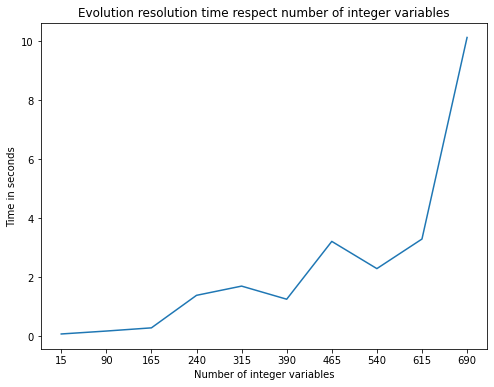

In [31]:
int_size = int_col*len(cities)
plt.figure(figsize=(8, 6))
plt.plot(int_size, times)
plt.xticks(int_size)
plt.title('Evolution resolution time respect number of integer variables')
plt.xlabel('Number of integer variables')
plt.ylabel('Time in seconds')
plt.show()

As it is shown in the plot, if the number of integer (binary in this case) variables increases, more time is needed to resolve the problem. In spite of the clear peaks in the graph, it can be seen how the trend is positive, even exponential as the number of binary variables is larger.

Several executions have beem performed. In most of them several peaks as the one in the plot appeared, so it can be considered a normal behaviour due to complex resolution situations.

## G. Different values for one parameter

It is clear that the cost associated to send exchange respirators between autonomous communities is high. For this reason, several instances with the same data using different values for the parameter $c_2$ are resolved. This value reflects logistic or management cost per respirator. At the end, it quantifies the number of respirators exchanged, since the transportation cost only depends on the distance, not on the amount of devices.

\begin{align*}
    c_2 \ (\frac{1000 \ \text{euros}}{\text{number of respirators}}) \cdot x_{ij} \ (\text{number of respirators}) = \text{cost}
\end{align*}

In [32]:
c2_values = np.arange(0.5, 5.5, 0.5)
results = []
models = []

for new_c2 in c2_values:
    new_model = get_integer_model(c1, new_c2, len(countries), w, z, display=False)
    models.append(new_model)
    results = np.append(results, pyo.value(new_model.OBJ))

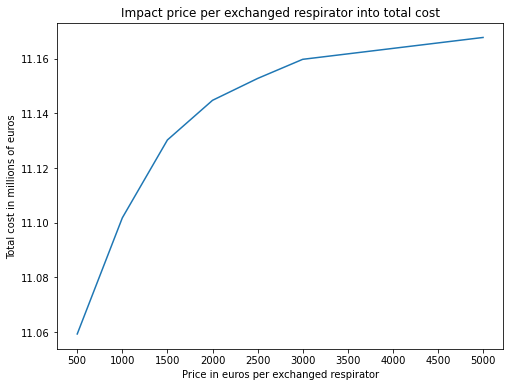

In [33]:
x_labels = c2_values*1000
plt.figure(figsize=(8, 6))
plt.plot(x_labels, results/1000)
plt.xticks(x_labels)
plt.title('Impact price per exchanged respirator into total cost')
plt.xlabel('Price in euros per exchanged respirator')
plt.ylabel('Total cost in millions of euros')
plt.show()

The total cost in terms of $c_2$ has a logarithmic growth. This behaviour shows us how the total cost could be reduced in an exponential way. The last value in $x$ axis ($c_2 = 5$) corresponds with the predefined value (5.000 euros per respirator). Once the option of buying abroad has been implemented, in most of the cities is the chosen strategy. 

In [34]:
show_exchangue(models[-1])

# respirators   | to         | from      
---------------------------------------------
              3 | Logroño    | Santiago  
---------------------------------------------
              1 | Barcelona  | Santiago  


In [35]:
show_purchase(models[-1])

City         |  USA  |  CHI  |  UK   |  GER  |  FR  
-----------------------------------------------------
Santiago     |  0.0  |  0.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Oviedo       |  0.0  |  0.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Santander    |  0.0  |  0.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Vitoria      |  0.0  |  0.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Pamplona     |  0.0  |  1.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Logroño      |  0.0  |  0.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Zaragoza     |  0.0  |  1.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Barcelona    |  1.0  |  1.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Valladolid   |  0.0  |  1.0  |  0.0  

However, if the value per respirator ($c_2$) is decreased, the strategy is going to change and most of the cities select exchanging respirators instead of buying new ones. This reduces the cost in an exponential way. That is how it would be in the case of $c_2 = 0.5$, what means 500 euros per respirator.

In [36]:
show_exchangue(models[0])

# respirators   | to         | from      
---------------------------------------------
             24 | Pamplona   | Santiago  
---------------------------------------------
              3 | Logroño    | Santiago  
---------------------------------------------
             19 | Zaragoza   | Valencia  
---------------------------------------------
             61 | Barcelona  | Valencia  
---------------------------------------------
             17 | Madrid     | Santiago  
---------------------------------------------
              6 | Madrid     | Oviedo    
---------------------------------------------
             14 | Madrid     | Santander 
---------------------------------------------
             22 | Madrid     | Vitoria   
---------------------------------------------
              5 | Madrid     | Valencia  
---------------------------------------------
             12 | Murcia     | Santiago  


In [37]:
show_purchase(models[0])

City         |  USA  |  CHI  |  UK   |  GER  |  FR  
-----------------------------------------------------
Santiago     |  0.0  |  0.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Oviedo       |  0.0  |  0.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Santander    |  0.0  |  0.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Vitoria      |  0.0  |  0.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Pamplona     |  0.0  |  0.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Logroño      |  0.0  |  0.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Zaragoza     |  0.0  |  0.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Barcelona    |  0.0  |  1.0  |  0.0  |  0.0  |  0.0 
-----------------------------------------------------
Valladolid   |  0.0  |  1.0  |  0.0  

Only two cities (Barcelona and Valladolid) buy respirators from China, and the difference in the total cost is notable.

In [38]:
print('Diference between c2=0.5 and c2=5:')
show_saving(models[-1], models[0])

Diference between c2=0.5 and c2=5:
Saving of 0.11 millions of euros
